In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("datos_nuevas_variables.csv")

In [20]:
df = df.rename(columns={'Partículas<2.5': 'Particulas_2_5',
                       'Partículas<10': 'Particulas_10'})

In [21]:
target = "Dióxido de Nitrógeno"

In [22]:
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [23]:
param_grid_xgb = {
    'n_estimators': [35, 50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

In [24]:
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               verbose=3)

In [25]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-462.348 total time=   6.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-409.570 total time=   5.4s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=0.8;, score=-401.744 total time=   5.4s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-462.457 total time=   4.9s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-409.542 total time=   5.0s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=35, subsample=1.0;, score=-401.723 total time=   5.2s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-370.144 total time=   7.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=-326.346 total time=   6.2s
[CV 3/3] END learning_rate=0.01, ma

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [35, 50, 100],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [26]:
modelo_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = modelo_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXgboost NO2:")
print(f"mse: {mse_xgb:.2f}")
print(f"r2 score: {r2_xgb:.2f}")


Xgboost NO2:
mse: 12.44
r2 score: 0.98


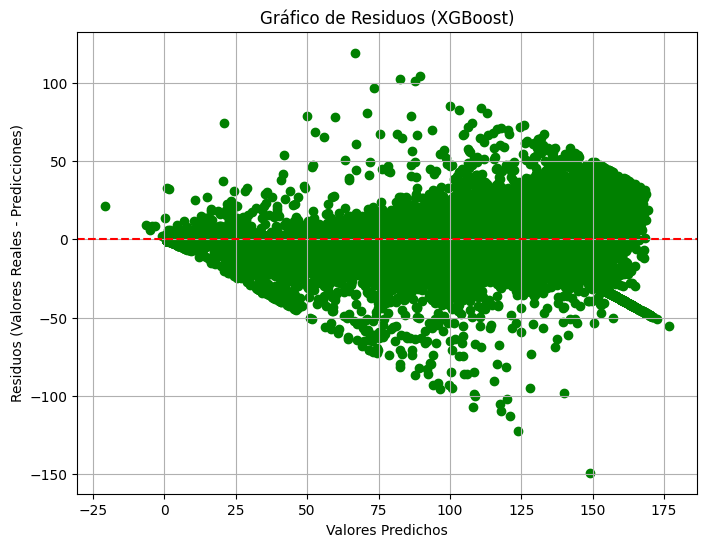

In [28]:
plt.figure(figsize=(8, 6))
residuals_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals_xgb, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (Valores Reales - Predicciones)')
plt.title('Gráfico de Residuos (XGBoost)')
plt.grid(True)
plt.show()

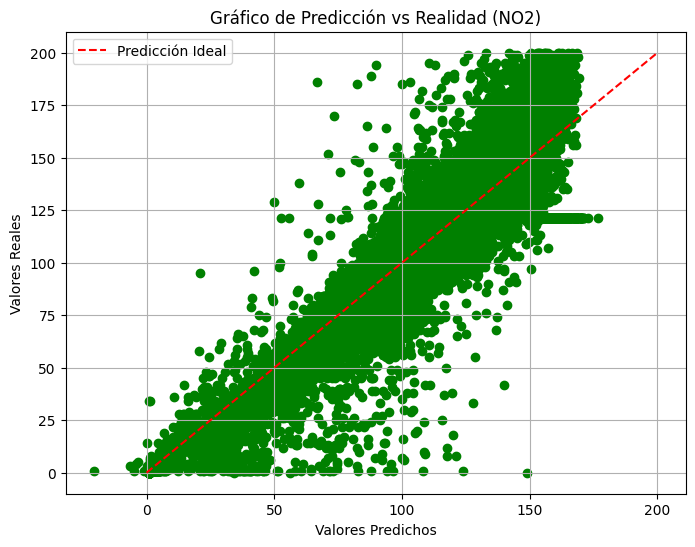

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, y_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Predicción Ideal')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Gráfico de Predicción vs Realidad (NO2)')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
import joblib

In [39]:
joblib.dump(modelo_xgb, "modelo_xgb_NO2.pkl")

['modelo_xgb_NO2.pkl']

In [42]:
params = grid_search_xgb.best_params_
params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}